*Arthur PINEL*

# TP Python I : Transformations géométriques sur des images

## 3.1 Importation et affichage des images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

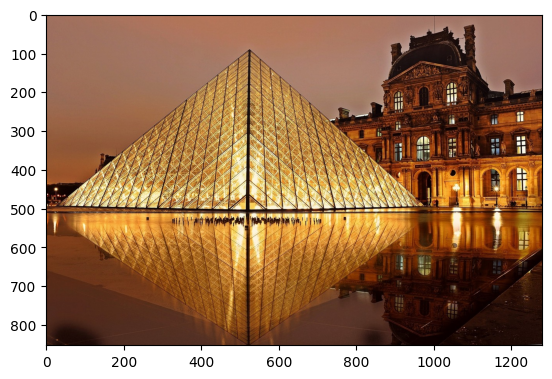

In [2]:
louvre = plt.imread("Louvre.jpg")
plt.imshow(louvre)

In [3]:
print(louvre[50,50])

[159 112  94]


### Exercice 3.1.

Deux images sont fournies sur Moodle dans la partie concernant ce TP

In [6]:
# Importation des images
louvre = plt.imread("Louvre.jpg")
cygne = plt.imread("cygne.jpg")

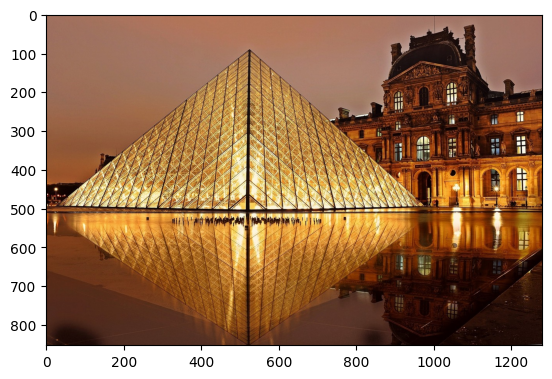

In [7]:
# Affichage Louvre
plt.imshow(louvre)

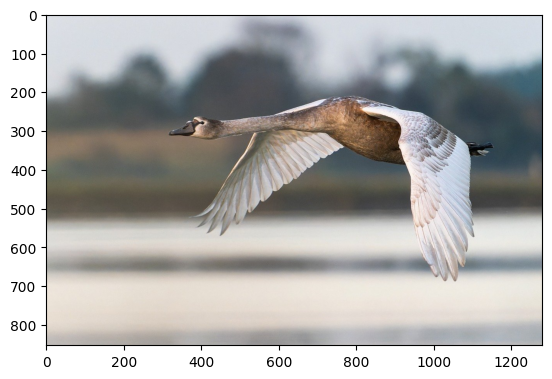

In [8]:
# Affichage cygne
plt.imshow(cygne)

In [9]:
# >> Afficher les coins

# Coins louvre :
print("Louvre =>")
height_louvre, width_louvre, color_size_louvre = louvre.shape
print("Haut gauche :", louvre[0,0])
print("Bas gauche :", louvre[height_louvre - 1, 0])
print("Haut droite :", louvre[0, width_louvre - 1])
print("Bas droite :", louvre[height_louvre - 1, width_louvre - 1])
print()

print("Cygne =>")
# Coins louvre :
height_louvre, width_louvre, color_size_louvre = cygne.shape
print("Haut gauche :", cygne[0,0])
print("Bas gauche :", cygne[height_louvre - 1, 0])
print("Haut droite :", cygne[0, width_louvre - 1])
print("Bas droite :", cygne[height_louvre - 1, width_louvre - 1])

Louvre =>
Haut gauche : [162 114  94]
Bas gauche : [59 32 23]
Haut droite : [163 109  97]
Bas droite : [227 217 215]

Cygne =>
Haut gauche : [221 225 228]
Bas gauche : [193 189 186]
Haut droite : [213 220 228]
Bas droite : [183 183 183]


### Exercice 3.2 (centre).

La méthode .shape() retourne les dimensions d’un ndarray. Pour
récupérer les dimensions d’une image appelée image , on pourra utiliser la commande
image.shape([0 :2]). La fonction int() retourne la partie entière d’un nombre à virgule flottante
(ce qui sera utile pour bien avoir des coordonnées entières).

In [10]:
def get_center(image):
    height, width, color_size = image.shape
    return (height//2, width//2)

In [11]:
center_height, center_width = get_center(louvre)

print("Center louvre :", center_height, center_width) 
print("Couleur centre:", louvre[center_height][center_width])

Center louvre : 426 640
Couleur centre: [120  65  26]


## 3.2 Création des matrices et transformations mathéma-tiques

Pour les diérents exercices, lorsqu’une matrice est demandée elle sera de la classe de numpy
(dans le but de pouvoir utiliser le produit matriciel de numpy). Tous les points et les vecteurs
seront simplement représentés par un couple de coordonnées.

### Exercice 3.3 (Translation)

Créer une fonction translation(vecteur, point) qui prend en
entrée un vecteur et un point et retourne l’image du point par la translation de vecteur donné.
Les vecteur et point seront des couples de coordonnées. Vous pouvez les transformer en classe
array de numpy, utiliser l’addition de numpy et retourner un couple avec la fonction tuple() qui
transforme un objet de type array et le transforme en un uplet (tuple en anglais)

In [12]:
def translation(vecteur, point):
    return [point[0] + vecteur[0], point[1] + vecteur[1]]

In [13]:
vecteur = np.array([10,10])
point = np.array([100,100])

translation(vecteur, point)

[np.int64(110), np.int64(110)]

### Exercice 3.4 (Homothétie).

Créer une fonction homothetie(centre, rapport, point) qui
prend en entrée le centre, le rapport d’une homothétie, un point et retourne l’image du point par l’homothétie de centre et de rapport donnés.

In [14]:
def homothetie(centre,rapport,point):
    n_point = translation(-1*centre,point)
    n_point = np.multiply(n_point,rapport)
    n_point = translation(centre,n_point)
    return n_point
    

In [15]:
centre = np.array([100,100])
rapport = 5
point = np.array([200,200])

homothetie(centre,rapport,point)

[np.int64(600), np.int64(600)]

### Exercice 3.5 (Matrice de rotation). 

Créer une fonction matrice_rotation(angle) qui prend en entrée un angle en degrés et retourne la matrice de la rotation pour cet angle. On utilisera la
bibliothèque math avec les fonctions cos, sin et radians. Les fonctions sinus et cosinus prennent
en argument des radians. Il faudra donc convertir les degrés en radians

In [16]:
def matrice_rotation(angle):
    radian = math.radians(angle)
    return np.array([
        [math.cos(radian), -math.sin(radian)],
        [math.sin(radian), math.cos(radian)]
    ])

In [17]:
matrice_rotation(45)

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

### Exercice 3.6 (Rotation). 

Créer une fonction rotation(centre, angle, point) qui prend en entrée le centre de la rotation, son angle, un point et retourne l’image du point par la rotation de centre et d’angle donnés. On pourra faire appel à la fonction créée à l’Exercice 3.5.

In [18]:
def rotation(centre,angle,point):
    m_rotation = matrice_rotation(angle)
    n_point = translation(-1*centre,point)
    n_point = np.matmul(m_rotation,n_point)
    n_point = translation(centre,n_point)
    return n_point

In [19]:
centre = np.array([1,1])
angle = 90
point = np.array([2,1])

rotation(centre,angle,point)

[np.float64(1.0), np.float64(2.0)]

### Exercice 3.7 (Symétrie (facultatif)).

Créer une fonction symetrie(point,coefficients_droite) qui prend en entrées un point et les coecients (a, b, c ) de la droite D d’équation ax + by + c = 0 et retourne l’image du point par la symétrie d’axe D.

In [20]:
def symetrie(point,coefficients_droite):
    x = point[0]
    y = point[1]
    a = coefficients_droite[0]
    b = coefficients_droite[1]
    c = coefficients_droite[2]
    return [
        x - ( 2*a*((a*x + b*y + c)/(a*a + b*b)) ),
        y - ( 2*b*((a*x + b*y + c)/(a*a + b*b)) )
    ]

In [21]:
point = np.array([3,2])
coefficients_droite = (1, -1, 0)

symetrie(point,coefficients_droite)

[np.float64(2.0), np.float64(3.0)]

## 3.3 Transformations géométriques sur les images

### Exercice 3.8 (Homothétie). 

Écrire une fonction homothetie_image(image,rapport,centre) qui prend en entrées une image, un rapport et un centre et retourne l’image transformée par l’homothétie de centre et de rapport donnés en arguments.

In [30]:
def homothetie_image(image,rapport,centre):
    (m,n) = image.shape[0:2]
    nouvelle_image = np.zeros((m,n, 3), dtype = np.uint8)
    for x in range(m):
        for y in range(n):
            n_point = homothetie(centre,1/rapport,[x,y])
            n_x = int(n_point[0])
            n_y = int(n_point[1])
            if 0 <= n_x < m and 0 <= n_y < n:
                nouvelle_image[x][y] = image[n_x][n_y]
    return nouvelle_image

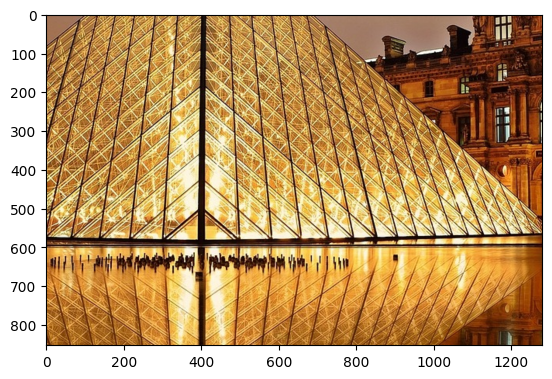

In [31]:
image = louvre

centre = np.array(get_center(image))
rapport = 2
point = np.array([10,10])

nouvelle_image = homothetie_image(image,rapport,centre)

plt.imshow(nouvelle_image)

### Exercice 3.9 (Rotation).

Écrire une fonction rotation_image(image,angle,centre) qui prend en entrées une image, un angle et un centre et retourne l’image transformée par la rotation de centre et d’angle donnés en arguments.

In [32]:
def rotation_image(image,angle,centre):
    (m,n) = image.shape[0:2]
    nouvelle_image = np.zeros((m,n, 3), dtype = np.uint8)
    for x in range(m):
        for y in range(n):
            n_point = rotation(centre,-angle,[x,y])
            n_x = int(n_point[0])
            n_y = int(n_point[1])
            if 0 <= n_x < m and 0 <= n_y < n:
                nouvelle_image[x][y] = image[n_x][n_y]
    return nouvelle_image

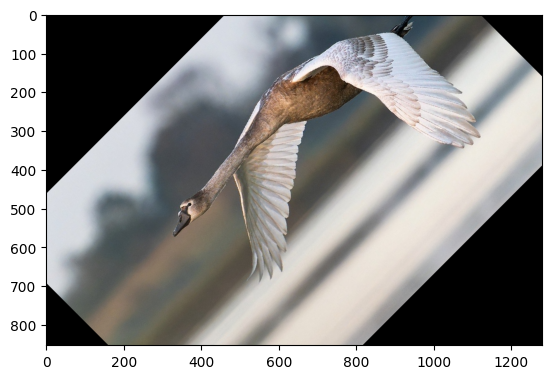

In [33]:
image = cygne

centre = np.array(get_center(image))
angle = 45

nouvelle_image = rotation_image(image,angle,centre)

plt.imshow(nouvelle_image)

### Exercice 3.10 (Symétrie (facultatif)).

Écrire une fonction symetrie_image(image,coefficients_droite) qui prend en entrées une image et le triplet (a, b, c ) des coefficients de la droite d’équation
ax + by + c = 0 et retourne la transformation de l’image par la symétrie d’axe la droite donnée.

In [38]:
def symetrie_image(image,coefficients_droite):
    (m,n) = image.shape[0:2]
    nouvelle_image = np.zeros((m,n, 3), dtype = np.uint8)
    for x in range(m):
        for y in range(n):
            n_point = symetrie([x,y],coefficients_droite)
            n_x = int(n_point[0])
            n_y = int(n_point[1])
            if 0 <= n_x < m and 0 <= n_y < n:
                nouvelle_image[x][y] = image[n_x][n_y]
    return nouvelle_image

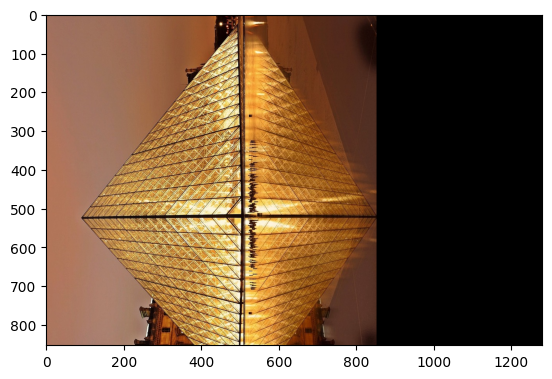

In [39]:
image = louvre
coefficients_droite = (1, -1, 0)

nouvelle_image = symetrie_image(image,coefficients_droite)

plt.imshow(nouvelle_image)